In [3]:
#Data Import and Preprocessing

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stop_words = set(stopwords.words('english'))


ps = PorterStemmer()

data = pd.read_csv("ELEC_IntegratedCircuits.csv");
t = data.iloc[:,1:2];
ft=t.values.tolist();

text=[]
for i in ft:
    for j in i:
        word_tokens = word_tokenize(j)
        filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
        p=' '.join(word for word in filtered_sentence)
        text.append(p);

print(text);

["normal , activ region mosfet reverse-bias respect substrat . thu , adjac devic fabric substrat electr isol without requir separ isol diffus . the bulk semiconductor region normal inact sinc current flow confin thin surfac channel directli gate . the bulk mo transistor call `` bodi '' `` back gate '' , effici oper , normal tie potenti sourc .", 'convent approach packag downhol electron modul includ “ pot ” electron modul foam silicon substanc . while pot viabl solut surviv harsh downhol environ , subject potenti manufactur field mainten problem . for exampl , signific invest build test electron modul , becom damag beyond repair subsequ foaming/pot process . when pot cure , instanc , move wire and/or place stress variou electron compon circuit board , therebi increas failur rate circuit board .', 'transient voltag suppressor ( tv ) devic use protect integr circuit damag caus voltag impos onto integr circuit . An integr circuit design oper normal rang voltag . howev , situat electrostat

In [4]:
#Vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer

# tokenize and build vocab
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectorizer.fit(text)
print(vectorizer.get_feature_names())
X=[]
for i in text:
    vector = vectorizer.transform([i]);
    for j in vector.toarray():
        X.append(j);
print(X);

['006', '006 inch', '006 inch 150', '1064', '1064 nm', '1064 nm photon', '1064nm', '1064nm continu', '1064nm continu wave', '108a', '108a 108b', '108b', '108c', '108c 108d', '108c 108d partially', '108d', '108d partially', '108d partially deplet', '1107nm', '1107nm thi', '1107nm thi photon', '12', '12 inch', '12 inch diamet', '120a', '120a 120b', '120a 120b compris', '120b', '120b compris', '120b compris thin', '120c', '120c 12od', '120c 12od compris', '12od', '12od compris', '12od compris thin', '13', '13 56', '13 56 mhz', '146', '146 overlay', '146 overlay plate', '150', '150 micron', '150 micron often', '240', '240 nm', '240nm', '55', '55 13', '55 13 56', '55 limit', '55 limit thereto', '56', '56 mhz', '56 mhz thi', '60', '60 hz', '90', '90 absorpt', '90 absorpt absorb', 'abil', 'abil continu', 'abil continu wave', 'abil continuous', 'abil continuous wav', 'absorb', 'absorb increas', 'absorb increas length', 'absorb ingaa', 'absorb ingaa mu', 'absorpt', 'absorpt absorb', 'absorpt ab

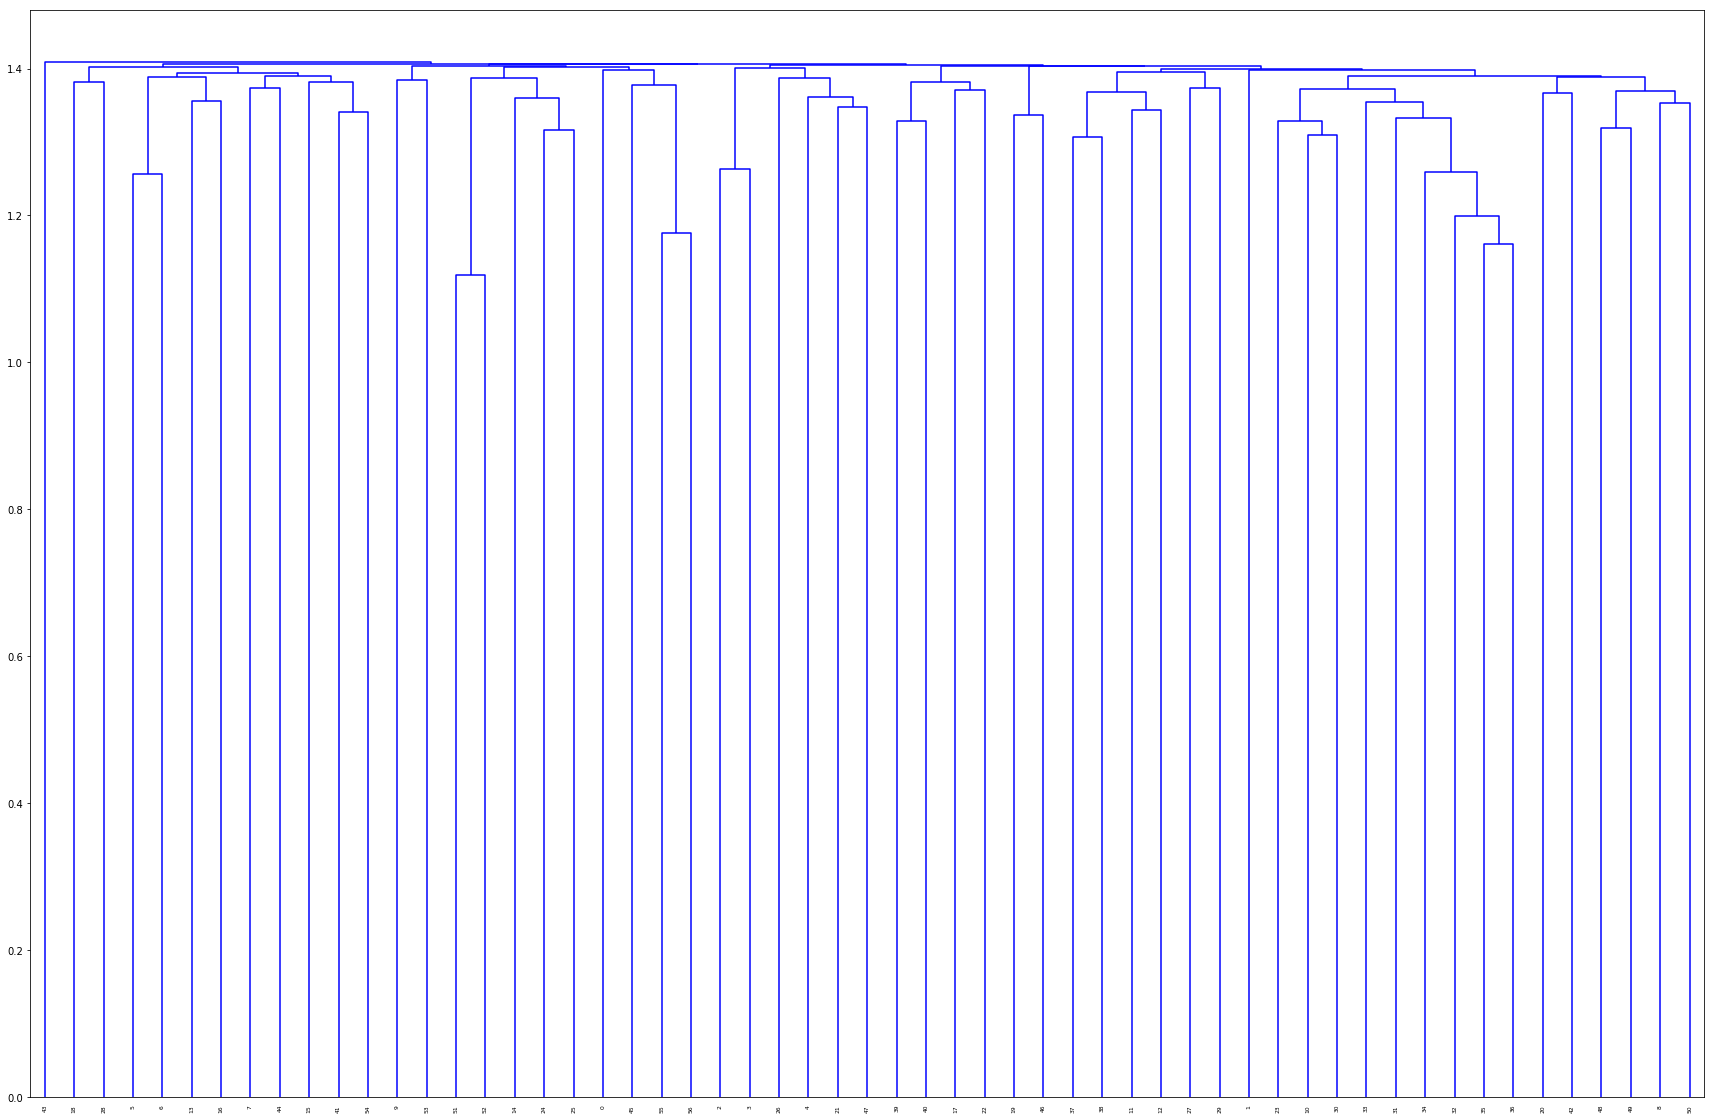

In [5]:
#Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')
ll = data.iloc[:,0:1];

labelList = ll.values.tolist();
plt.figure(figsize=(30, 20))  
dendrogram(linked)
plt.show()
plt.close('all')

In [37]:
#KMeans Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_;
print (labels)

[2 2 0 0 2 2 1 0 2 0 0 2 2 2 0 1 2 2 0 1 0 0 2 0 0 0 0 1]


In [ ]:
from dec import DeepEmbeddingClustering

In [59]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim import corpora, models
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stop_words = set(stopwords.words('english')) n

ps = PorterStemmer()

data = pd.read_csv("ELEC_IntegratedCircuits.csv");
t = data.iloc[:,1:2];
ft=t.values.tolist();

text=[]
for i in ft:
    for j in i:
        word_tokens = word_tokenize(j)
        filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
        text.append(filtered_sentence);


[nltk_data] Downloading package wordnet to /Users/lakshay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
dictionary = gensim.corpora.Dictionary(text);

print(dictionary)
        
bow_corpus = [dictionary.doc2bow(doc) for doc in text]

Dictionary(844 unique tokens: ['activ', 'adjac', 'back', 'bodi', 'bulk']...)


In [60]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)

[(0, 0.13857167348360194),
 (1, 0.16724430478236138),
 (2, 0.13857167348360194),
 (3, 0.1217992593768239),
 (4, 0.33448860956472276),
 (5, 0.10066851661542511),
 (6, 0.16724430478236138),
 (7, 0.16724430478236138),
 (8, 0.10066851661542511),
 (9, 0.043323254017906224),
 (10, 0.16724430478236138),
 (11, 0.10989904218484249),
 (12, 0.16724430478236138),
 (13, 0.055223471209887645),
 (14, 0.06445399677930504),
 (15, 0.13857167348360194),
 (16, 0.21979808436968498),
 (17, 0.16724430478236138),
 (18, 0.2771433469672039),
 (19, 0.16724430478236138),
 (20, 0.16724430478236138),
 (21, 0.3296971265545275),
 (22, 0.10066851661542511),
 (23, 0.13857167348360194),
 (24, 0.21979808436968498),
 (25, 0.10989904218484249),
 (26, 0.13857167348360194),
 (27, 0.16724430478236138),
 (28, 0.07199588531666566),
 (29, 0.16724430478236138),
 (30, 0.13857167348360194),
 (31, 0.16724430478236138),
 (32, 0.12228592220163305),
 (33, 0.06445399677930504),
 (34, 0.06494065960411419),
 (35, 0.10066851661542511),
 (3

 (788, 0.10225264807389528),
 (790, 0.10225264807389528),
 (791, 0.20450529614779056),
 (793, 0.10225264807389528),
 (794, 0.10225264807389528),
 (795, 0.10225264807389528),
 (797, 0.12341030897124707),
 (798, 0.12341030897124707),
 (799, 0.12341030897124707),
 (800, 0.12341030897124707),
 (801, 0.12341030897124707),
 (802, 0.12341030897124707),
 (803, 0.12341030897124707),
 (804, 0.12341030897124707)]
[(3, 0.18011577222012887),
 (9, 0.21355360704294457),
 (22, 0.14886779854995033),
 (24, 0.10834521737188797),
 (34, 0.016005621480411677),
 (35, 0.09924519903330022),
 (36, 0.04962259951665011),
 (38, 0.1836198853354606),
 (48, 0.1836198853354606),
 (77, 0.2001949463988308),
 (133, 0.04962259951665011),
 (199, 0.0752746679635726),
 (206, 0.057256284171399247),
 (216, 0.1366124561842436),
 (224, 0.09041772265976848),
 (234, 0.03548898011047228),
 (245, 0.0376373339817863),
 (253, 0.0683062280921218),
 (271, 0.2732249123684872),
 (289, 0.1366124561842436),
 (310, 0.0752746679635726),
 (351

In [61]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [62]:
for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"frequenc" + 0.006*"submount" + 0.006*"voltag" + 0.005*"die" + 0.005*"surfac" + 0.005*"test" + 0.005*"solder" + 0.005*"sink" + 0.005*"event" + 0.004*"logic"
Topic: 1 
Words: 0.007*"beam" + 0.007*"programm" + 0.006*"array" + 0.006*"cell" + 0.006*"refer" + 0.005*"molecular" + 0.005*"epitaxi" + 0.005*"asic" + 0.005*"typic" + 0.005*"fill"
Topic: 2 
Words: 0.006*"substrat" + 0.005*"packag" + 0.005*"pad" + 0.005*"carrier" + 0.005*"grid" + 0.005*"ic" + 0.005*"treat" + 0.005*"etch" + 0.004*"pcb" + 0.004*"conduct"
Topic: 3 
Words: 0.008*"IC" + 0.007*"packag" + 0.006*"thermal" + 0.005*"conduct" + 0.005*"wlp" + 0.005*"array" + 0.004*"land" + 0.004*"board" + 0.004*"grid" + 0.004*"..."
Topic: 4 
Words: 0.007*"pattern" + 0.006*"die" + 0.005*"solder" + 0.005*"correspond" + 0.005*"transfer" + 0.004*"part" + 0.004*"tape" + 0.004*"UV" + 0.004*"lead" + 0.004*"join"
Topic: 5 
Words: 0.007*"soc" + 0.006*"custom" + 0.005*"planar" + 0.005*"system-on-chip" + 0.005*"metal" + 0.005*"layer